In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
!pip install split-folders

In [85]:
!pip install torchsummary

In [1]:
import os
import zipfile
import numpy as np
import cv2
import random
import collections
import splitfolders
from glob import glob
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from time import time

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

In [2]:
print(os.getcwd())
print(os.listdir())

c:\Users\DMQA\Desktop\workspace\Today-I-Learned\2021-2-TheoryAndApplicationOfDeepLearning
['archive.zip', 'asl_alphabet_dataset', 'asl_alphabet_test', 'asl_alphabet_train', 'checkpoint_91.74', 'checkpoint_94.29', 'checkpoint_94.78', 'checkpoint_95.13', 'checkpoint_95.64', 'checkpoint_95.66', 'checkpoint_96.02', 'checkpoint_96.53', 'checkpoint_96.59', 'checkpoint_96.66', 'Resnet.ipynb', 'resnet50_checkpoint_90.48', 'resnet50_checkpoint_93.00', 'resnet50_checkpoint_93.61', 'resnet50_checkpoint_94.05', 'resnet50_checkpoint_94.91', 'resnet50_checkpoint_95.40', 'resnet50_checkpoint_95.45', 'resnet50_checkpoint_95.68', 'resnet50_checkpoint_95.92', 'resnet50_checkpoint_97.21', 'Resnet_HW.ipynb', 'test2.py']


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
path_to_zipfile = os.getcwd() + '/archive.zip'
directory_to_extract = os.getcwd()

with zipfile.ZipFile(path_to_zipfile, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract)

In [4]:
def plot_three_samples(letter):
    print("Samples images for letter", letter)
    path = 'C:/Users/DMQA/Desktop/workspace/Today-I-Learned/2021-2-TheoryAndApplicationOfDeepLearning/asl_alphabet_train/asl_alphabet_train/'
    img_path = path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

Samples images for letter A


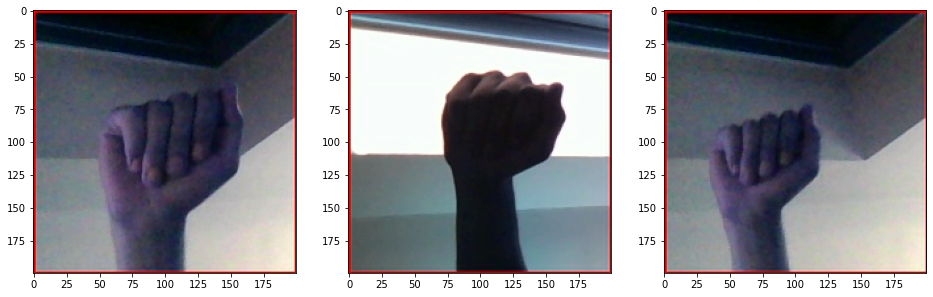

In [5]:
plot_three_samples('A')

In [6]:
splitfolders.ratio(os.getcwd()+'/asl_alphabet_train/asl_alphabet_train', output=os.getcwd()+'/asl_alphabet_dataset', seed=1337, ratio=(0.7,0.2,0.1))

Copying files: 87000 files [06:23, 226.61 files/s]


In [9]:
train_data_path = os.getcwd()+'/asl_alphabet_dataset/train'
test_data_path = os.getcwd()+'/asl_alphabet_dataset/test'
val_data_path = os.getcwd()+'/asl_alphabet_dataset/val'

train_transformer = transforms.Compose([transforms.Resize(224), transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                        transforms.Normalize([.5,.5,.5],[.5,.5,.5])])
val_transformer = transforms.Compose([transforms.Resize(224), transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                        transforms.Normalize([.5,.5,.5],[.5,.5,.5])])
test_transformer = transforms.Compose([transforms.Resize(224), transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                        transforms.Normalize([.5,.5,.5],[.5,.5,.5])])

train_dataset = datasets.ImageFolder(train_data_path, transform=train_transformer)
test_dataset = datasets.ImageFolder(test_data_path, transform=test_transformer)
val_dataset = datasets.ImageFolder(val_data_path, transform=val_transformer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)

print(dict(collections.Counter(train_dataset.targets)))
print(dict(collections.Counter(test_dataset.targets)))
print(dict(collections.Counter(val_dataset.targets)))


{0: 2100, 1: 2100, 2: 2100, 3: 2100, 4: 2100, 5: 2100, 6: 2100, 7: 2100, 8: 2100, 9: 2100, 10: 2100, 11: 2100, 12: 2100, 13: 2100, 14: 2100, 15: 2100, 16: 2100, 17: 2100, 18: 2100, 19: 2100, 20: 2100, 21: 2100, 22: 2100, 23: 2100, 24: 2100, 25: 2100, 26: 2100, 27: 2100, 28: 2100}
{0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300, 6: 300, 7: 300, 8: 300, 9: 300, 10: 300, 11: 300, 12: 300, 13: 300, 14: 300, 15: 300, 16: 300, 17: 300, 18: 300, 19: 300, 20: 300, 21: 300, 22: 300, 23: 300, 24: 300, 25: 300, 26: 300, 27: 300, 28: 300}
{0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 600, 10: 600, 11: 600, 12: 600, 13: 600, 14: 600, 15: 600, 16: 600, 17: 600, 18: 600, 19: 600, 20: 600, 21: 600, 22: 600, 23: 600, 24: 600, 25: 600, 26: 600, 27: 600, 28: 600}


In [10]:
resnet_18 = models.resnet18(pretrained=True).cuda()
resnet_50 = models.resnet50(pretrained=True).cuda()

print('***************************Resnet 18***************************')
summary(resnet_18,(3,224,224))

print('\n'+'***************************Resnet 50***************************')
summary(resnet_50,(3,224,224))

***************************Resnet 18***************************


C:\Users\DMQA\anaconda3\envs\main\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [11]:
for param in resnet_18.parameters():
  param.requires_grad = False

for param in resnet_50.parameters():
  param.requires_grad = False

resnet18_in_features = resnet_18.fc.in_features
resnet50_in_featuers = resnet_50.fc.in_features

new_resnet18_fc = torch.nn.Sequential(nn.Linear(in_features=resnet18_in_features, out_features=29, bias=True))
new_resnet50_fc = torch.nn.Sequential(nn.Linear(in_features=resnet50_in_featuers, out_features=1000, bias=True), nn.ReLU(inplace=True), nn.Linear(in_features=1000, out_features=29, bias=True))

resnet_18.fc = new_resnet18_fc
resnet_50.fc = new_resnet50_fc

criterion = nn.CrossEntropyLoss()
resnet18_optimizer = optim.Adam(resnet_18.parameters(), lr = 0.001)
resnet50_optimizer = optim.Adam(resnet_50.parameters(), lr = 0.001)


In [14]:
r18_print_every = 1000
r18_steps = 0
r18_train_losses, r18_val_losses = [], []

resnet_18.to(device)
for epoch in tqdm(range(10)):
    r18_iterations = 0
    r18_running_loss = 0
    r18_correct_train = 0
    r18_total_train = 0
    r18_start_time = time()
    
    resnet_18.train()
    for i, (images, labels) in enumerate(train_loader):
        r18_steps += 1
        images = images.to(device)
        labels = labels.to(device)
            
        # Forward pass
        output = resnet_18(images)
        r18_loss = criterion(output, labels)
    
        r18_correct_train += (torch.max(output, dim=1)[1] == labels).sum()
        r18_total_train += labels.size(0)
        
        # Backward and optimize
        resnet18_optimizer.zero_grad()
        r18_loss.backward()
        resnet18_optimizer.step()
        
        r18_iterations += 1
        r18_running_loss += r18_loss.item()
        
        if r18_steps % r18_print_every == 0:
            print(f'Epoch [{epoch + 1}]/[{10}]. Batch [{i + 1}]/[{len(train_loader)}]. Train loss {r18_running_loss / r18_steps}.', end=' ')
            print(f'Train acc {r18_correct_train / r18_total_train * 100}.', end=' ')
            with torch.no_grad():
                resnet_18.eval()
                r18_correct_val, r18_total_val = 0, 0
                r18_val_loss = 0
                for images, labels in val_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    output = resnet_18(images)
                    r18_loss = criterion(output, labels)
                    r18_val_loss += r18_loss.item()

                    r18_correct_val += (torch.max(output, dim=1)[1] == labels).sum()
                    r18_total_val += labels.size(0)

            print(f'Val loss {r18_val_loss / len(val_loader)}. Val acc {r18_correct_val / r18_total_val * 100}')

            r18_train_losses.append(r18_running_loss / r18_total_train)
            r18_val_losses.append(r18_val_loss / r18_total_val)
        
        
    print(f'Epoch took {time() - r18_start_time}') 
    #torch.save(resnet_18, f'checkpoint_{r18_correct_val / r18_total_val * 100:.2f}')

    #https://www.kaggle.com/julichitai/asl-alphabet-classification-using-pytorch

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1]/[10]. Batch [1000]/[1903]. Train loss 1.0412168953716754. Train acc 77.32500457763672. Val loss 0.5392595138229279. Val acc 87.98342895507812


 10%|█         | 1/10 [11:03<1:39:35, 663.94s/it]

Epoch took 663.9360513687134
Epoch [2]/[10]. Batch [97]/[1903]. Train loss 0.020363125801086426. Train acc 89.52963256835938. Val loss 0.3595802398950795. Val acc 91.62638092041016
Epoch [2]/[10]. Batch [1097]/[1903]. Train loss 0.11536840669562419. Train acc 92.53646087646484. Val loss 0.27336622615435724. Val acc 93.44498443603516


 20%|██        | 2/10 [17:49<1:08:16, 512.02s/it]

Epoch took 405.67240595817566
Epoch [3]/[10]. Batch [194]/[1903]. Train loss 0.013486551437526941. Train acc 92.73517608642578. Val loss 0.23974111558900355. Val acc 93.70396423339844
Epoch [3]/[10]. Batch [1194]/[1903]. Train loss 0.0530484464071691. Train acc 94.28653717041016. Val loss 0.2019485333869251. Val acc 94.69383239746094


 30%|███       | 3/10 [24:44<54:34, 467.82s/it]  

Epoch took 415.21801924705505
Epoch [4]/[10]. Batch [291]/[1903]. Train loss 0.010680285951743524. Train acc 94.1580810546875. Val loss 0.18252257214821394. Val acc 94.90676879882812
Epoch [4]/[10]. Batch [1291]/[1903]. Train loss 0.03200655946321786. Train acc 95.41537475585938. Val loss 0.1600900873349736. Val acc 95.50529479980469


 40%|████      | 4/10 [31:52<45:12, 452.06s/it]

Epoch took 427.9141924381256
Epoch [5]/[10]. Batch [388]/[1903]. Train loss 0.009931095659267157. Train acc 93.91913604736328. Val loss 0.15906398120451148. Val acc 95.40746307373047
Epoch [5]/[10]. Batch [1388]/[1903]. Train loss 0.02424964980636206. Train acc 95.48810577392578. Val loss 0.14587268225409597. Val acc 95.74125671386719


 50%|█████     | 5/10 [38:15<35:35, 427.03s/it]

Epoch took 382.6370315551758
Epoch [6]/[10]. Batch [485]/[1903]. Train loss 0.008601200293004513. Train acc 94.6069564819336. Val loss 0.1326559205328562. Val acc 96.07504272460938
Epoch [6]/[10]. Batch [1485]/[1903]. Train loss 0.01871110204691914. Train acc 95.9701156616211. Val loss 0.12350400576186168. Val acc 96.42610168457031


 60%|██████    | 6/10 [44:36<27:25, 411.48s/it]

Epoch took 381.3107898235321
Epoch [7]/[10]. Batch [582]/[1903]. Train loss 0.00792050164906929. Train acc 94.90442657470703. Val loss 0.13984861065724496. Val acc 95.58586120605469
Epoch [7]/[10]. Batch [1582]/[1903]. Train loss 0.015736493318270033. Train acc 96.07894134521484. Val loss 0.12543401994757888. Val acc 96.12109375


 70%|███████   | 7/10 [50:58<20:04, 401.62s/it]

Epoch took 381.3087913990021
Epoch [8]/[10]. Batch [679]/[1903]. Train loss 0.007903718108577387. Train acc 94.9097900390625. Val loss 0.11932864800459168. Val acc 96.19590759277344
Epoch [8]/[10]. Batch [1679]/[1903]. Train loss 0.01409372643015037. Train acc 96.21798706054688. Val loss 0.10482232424758141. Val acc 96.90377807617188


 80%|████████  | 8/10 [57:19<13:10, 395.25s/it]

Epoch took 381.59562730789185
Epoch [9]/[10]. Batch [776]/[1903]. Train loss 0.007376092752674594. Train acc 95.10308837890625. Val loss 0.12979605922245627. Val acc 95.71823120117188
Epoch [9]/[10]. Batch [1776]/[1903]. Train loss 0.012386315908447347. Train acc 96.33129119873047. Val loss 0.0969345603553273. Val acc 97.0706787109375


 90%|█████████ | 9/10 [1:03:41<06:31, 391.18s/it]

Epoch took 382.22626662254333
Epoch [10]/[10]. Batch [873]/[1903]. Train loss 0.006977206755998648. Train acc 95.38946533203125. Val loss 0.09625021846446982. Val acc 97.09944915771484
Epoch [10]/[10]. Batch [1873]/[1903]. Train loss 0.011315235980247196. Train acc 96.3978271484375. Val loss 0.10885104204615506. Val acc 96.45487976074219


100%|██████████| 10/10 [1:10:03<00:00, 420.39s/it]

Epoch took 382.0373742580414


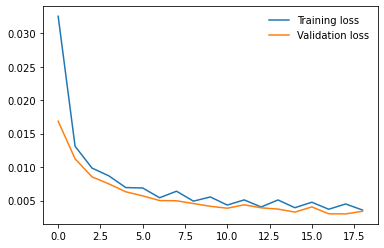

In [15]:
plt.plot(r18_train_losses, label='Training loss')
plt.plot(r18_val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [16]:
with torch.no_grad():
  resnet_18.eval()
  r18_correct_test, r18_total_test = 0, 0
  r18_test_loss = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    output = resnet_18(images)
    r18_cost = criterion(output, labels)
    r18_test_loss += r18_cost.item()

  r18_correct_test += (torch.max(output, dim=1)[1] == labels).sum()
  r18_total_test += labels.size(0)

print(f'Test loss {r18_test_loss / len(test_loader)}. Test acc {r18_correct_test / r18_total_test * 100}')

Test loss 0.10008757405079269. Test acc 96.875


In [17]:
r50_print_every = 1000
r50_steps = 0
r50_train_losses, r50_val_losses = [], []

resnet_50.to(device)
for epoch in tqdm(range(10)):
    r50_iterations = 0
    r50_running_loss = 0
    r50_correct_train = 0
    r50_total_train = 0
    r50_start_time = time()
    
    resnet_50.train()
    for i, (images, labels) in enumerate(train_loader):
        r50_steps += 1
        images = images.to(device)
        labels = labels.to(device)
            
        # Forward pass
        output = resnet_50(images)
        r50_loss = criterion(output, labels)
    
        r50_correct_train += (torch.max(output, dim=1)[1] == labels).sum()
        r50_total_train += labels.size(0)
        
        # Backward and optimize
        resnet50_optimizer.zero_grad()
        r50_loss.backward()
        resnet50_optimizer.step()
        
        r50_iterations += 1
        r50_running_loss += r50_loss.item()
        
        if r50_steps % r50_print_every == 0:
            print(f'Epoch [{epoch + 1}]/[{10}]. Batch [{i + 1}]/[{len(train_loader)}]. Train loss {r50_running_loss / r50_steps}.', end=' ')
            print(f'Train acc {r50_correct_train / r50_total_train * 100}.', end=' ')
            with torch.no_grad():
                resnet_50.eval()
                r50_correct_val, r50_total_val = 0, 0
                r50_val_loss = 0
                for images, labels in val_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    output = resnet_50(images)
                    r50_loss = criterion(output, labels)
                    r50_val_loss += r50_loss.item()

                    r50_correct_val += (torch.max(output, dim=1)[1] == labels).sum()
                    r50_total_val += labels.size(0)

            print(f'Val loss {r50_val_loss / len(val_loader)}. Val acc {r50_correct_val / r50_total_val * 100}')

            r50_train_losses.append(r50_running_loss / r50_total_train)
            r50_val_losses.append(r50_val_loss / r50_total_val)
        
        
    print(f'Epoch took {time() - r50_start_time}') 
    #torch.save(resnet_50, f'resnet50_checkpoint_{r50_correct_val / r50_total_val * 100:.2f}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1]/[10]. Batch [1000]/[1903]. Train loss 0.9916651832461357. Train acc 69.96562957763672. Val loss 0.37652897841638405. Val acc 88.04673767089844


 10%|█         | 1/10 [08:55<1:20:23, 535.99s/it]

Epoch took 535.9862740039825
Epoch [2]/[10]. Batch [97]/[1903]. Train loss 0.020347236953675747. Train acc 85.8569564819336. Val loss 0.33381917082033985. Val acc 88.42081451416016
Epoch [2]/[10]. Batch [1097]/[1903]. Train loss 0.09375883787125348. Train acc 91.19474029541016. Val loss 0.19298822325045453. Val acc 93.58885955810547


 20%|██        | 2/10 [19:41<1:20:02, 600.27s/it]

Epoch took 645.2687368392944
Epoch [3]/[10]. Batch [194]/[1903]. Train loss 0.013147221497260034. Train acc 90.86662292480469. Val loss 0.24714520646681115. Val acc 91.41920471191406
Epoch [3]/[10]. Batch [1194]/[1903]. Train loss 0.048022171597275884. Train acc 93.05904388427734. Val loss 0.17906694393948022. Val acc 93.68669128417969


 30%|███       | 3/10 [30:27<1:12:28, 621.28s/it]

Epoch took 646.2801582813263
Epoch [4]/[10]. Batch [291]/[1903]. Train loss 0.011998288061469794. Train acc 91.62371063232422. Val loss 0.14525502592729983. Val acc 95.03338623046875
Epoch [4]/[10]. Batch [1291]/[1903]. Train loss 0.031592326301948304. Train acc 94.08161926269531. Val loss 0.1524585270533822. Val acc 94.88375091552734


 40%|████      | 4/10 [41:15<1:03:10, 631.72s/it]

Epoch took 647.7213335037231
Epoch [5]/[10]. Batch [388]/[1903]. Train loss 0.010209496533498168. Train acc 92.95263671875. Val loss 0.1439401634006622. Val acc 94.97007751464844
Epoch [5]/[10]. Batch [1388]/[1903]. Train loss 0.021307987679830855. Train acc 95.3440170288086. Val loss 0.1223137034141865. Val acc 95.6549301147461


 50%|█████     | 5/10 [52:03<53:09, 637.85s/it]  

Epoch took 648.7287571430206
Epoch [6]/[10]. Batch [485]/[1903]. Train loss 0.009737586373370142. Train acc 93.03479766845703. Val loss 0.12666986966214072. Val acc 95.59162139892578
Epoch [6]/[10]. Batch [1485]/[1903]. Train loss 0.01873686883888546. Train acc 95.21253967285156. Val loss 0.12206969931541597. Val acc 95.86786651611328


 60%|██████    | 6/10 [1:02:53<42:47, 641.76s/it]

Epoch took 649.3543984889984
Epoch [7]/[10]. Batch [582]/[1903]. Train loss 0.009017637789521056. Train acc 93.63724517822266. Val loss 0.18284118387519688. Val acc 93.92840576171875
Epoch [7]/[10]. Batch [1582]/[1903]. Train loss 0.015048015940012052. Train acc 95.74313354492188. Val loss 0.0946066894034236. Val acc 96.80018615722656


 70%|███████   | 7/10 [1:13:43<32:13, 644.54s/it]

Epoch took 650.2668762207031
Epoch [8]/[10]. Batch [679]/[1903]. Train loss 0.007887310505661714. Train acc 94.54621124267578. Val loss 0.11877507769179395. Val acc 96.04051971435547
Epoch [8]/[10]. Batch [1679]/[1903]. Train loss 0.012952873496032165. Train acc 96.02813720703125. Val loss 0.13387842183003484. Val acc 95.51680755615234


 80%|████████  | 8/10 [1:24:34<21:33, 646.70s/it]

Epoch took 651.3142776489258
Epoch [9]/[10]. Batch [776]/[1903]. Train loss 0.0071531340625006126. Train acc 95.05879211425781. Val loss 0.09344501140579739. Val acc 96.88651275634766
Epoch [9]/[10]. Batch [1776]/[1903]. Train loss 0.011491572991622996. Train acc 96.27323150634766. Val loss 0.09599680424306428. Val acc 96.81745147705078


 90%|█████████ | 9/10 [1:35:26<10:48, 648.35s/it]

Epoch took 651.9938881397247
Epoch [10]/[10]. Batch [873]/[1903]. Train loss 0.006484033822877488. Train acc 95.56486511230469. Val loss 0.11777730157212303. Val acc 96.27072143554688
Epoch [10]/[10]. Batch [1873]/[1903]. Train loss 0.010156462087144304. Train acc 96.51461791992188. Val loss 0.10865978005404199. Val acc 96.43761444091797


100%|██████████| 10/10 [1:46:19<00:00, 637.97s/it]

Epoch took 652.7584509849548


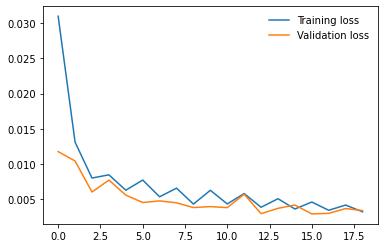

In [18]:
plt.plot(r50_train_losses, label='Training loss')
plt.plot(r50_val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [19]:
with torch.no_grad():
  resnet_50.eval()
  r50_correct_test, r50_total_test = 0, 0
  r50_test_loss = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    output = resnet_50(images)
    r50_test_cost = criterion(output, labels)
    r50_test_loss += r50_test_cost.item()

  r50_correct_test += (torch.max(output, dim=1)[1] == labels).sum()
  r50_total_test += labels.size(0)

print(f'Test loss {r50_test_loss / len(test_loader)}. Test acc {r50_correct_test / r50_total_test * 100}')

Test loss 0.09633137282788258. Test acc 96.875


In [ ]:
#https://deep-learning-study.tistory.com/534